In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../trainruns/")
sys.path.append("../")
import diagnostics


plt.rcParams.update({
    "text.usetex": True,
    "font.size": '16',
})

In [2]:
path_pars_po1 = '/ptmp/nbudanur/KS/public/po1/ctrans_3.60e+00/parameters.txt'
path_pars_po3 = '/ptmp/nbudanur/KS/public/po3/ctrans_3.60e+00/parameters.txt'

In [3]:
pars_po1=diagnostics.read_parameters(path_pars_po1)
pars_po3=diagnostics.read_parameters(path_pars_po3)

In [4]:
dataset_po1=diagnostics.get_dataset(pars_po1)
dataset_po3=diagnostics.get_dataset(pars_po3)

In [5]:
%matplotlib inline

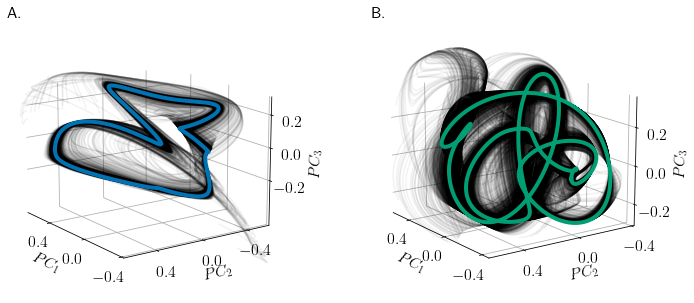

In [14]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, projection='3d')
ax2 = plt.subplot(122, projection='3d')

c_zoom = 0.8
for ax, dataset, ipo in zip([ax1, ax2],[dataset_po1, dataset_po3], [1,3]):

    diagnostics.visualize_data(dataset, ipo=ipo, pos=diagnostics.experiment.pos, ax=ax)
    ax.view_init(15,145)
#     ax.view_init(30, 70)
    
    ax.set_xlim(
        ax.get_xlim()[0] * c_zoom, 
        ax.get_xlim()[1] * c_zoom
        )
    ax.set_ylim(
        ax.get_ylim()[0] * c_zoom, 
        ax.get_ylim()[1] * c_zoom
        )
    ax.set_zlim(
        ax.get_zlim()[0] * c_zoom, 
        ax.get_zlim()[1] * c_zoom
        )
    
    ax.set_xticks([-0.4, 0.0, 0.4])
    ax.set_yticks([-0.4, 0.0, 0.4])
    ax.set_zticks([-0.2, 0.0, 0.2])
    ax.set_xlabel("$PC_1$", fontsize=16)
    ax.set_ylabel("$PC_2$", fontsize=16)
    ax.set_zlabel("$PC_3$", fontsize=16)
    ax.tick_params(labelsize=16)
    

ax1.set_title("A.", loc='left', fontsize=16)
ax2.set_title("B.", loc='left', fontsize=16)

fig.savefig("trainingdata.png", dpi=200)
    

In [15]:
!/mpcdf/soft/SLE_15/packages/x86_64/imagemagick/7.1.1/bin/convert -trim trainingdata.png ../tex/fig/trainingdata.png